## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE UNIFI

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://datascience.unifi.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Florence data science – Center od Data Science – University of Florence


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['https://datascience.unifi.it/index.php/fellows/',
 'http://datascience.unifi.it/#contact',
 'https://datascience.unifi.it/index.php/category/event/',
 'https://datascience.unifi.it/index.php/2020/12/14/post-doc-position-on-artificial-applications-cnr-florence/',
 'https://datascience.unifi.it/index.php/projects/',
 'https://www.dinfo.unifi.it/changelang-eng.html',
 'https://datascience.unifi.it/index.php/2020/12/23/two-scholarships-for-the-2nd-level-master-in-data-science-and-statistical-learning-md2sl/',
 '#0',
 'https://datascience.unifi.it/index.php/2020/09/03/cen-ibs-gmds-invited-session-on-causal-inference-and-machine-learning/',
 '#page',
 'https://datascience.unifi.it/index.php/category/uncategorized/',
 'http://datascience.unifi.it/',
 'https://datascience.unifi.it/index.php/members/',
 'https://datascience.unifi.it/index.php/category/jobresearchvisiting-opportunities/',
 'https://datascience.unifi.it/index.php/2020/06/18/phd-programme-in-statistics-and-data-science-cycle-xxx

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('http://datascience.unifi.it/'), res))
lista_url2=list(set(lista_url2))
lista_url2

['http://datascience.unifi.it/#contact',
 'http://datascience.unifi.it/#services',
 'http://datascience.unifi.it/index.php/events/',
 'http://datascience.unifi.it/index.php/steering-group/',
 'http://datascience.unifi.it/',
 'http://datascience.unifi.it/#about']

In [5]:
indices=[2,3,4]
lista_url2 = [lista_url2[i] for i in indices]
lista_url2

['http://datascience.unifi.it/index.php/events/',
 'http://datascience.unifi.it/index.php/steering-group/',
 'http://datascience.unifi.it/']

In [6]:
lista_url3 = list(filter(lambda x: x.startswith('https://datascience.unifi.it/'), res))
lista_url3 =list(set(lista_url3))
lista_url3

['https://datascience.unifi.it/index.php/fellows/',
 'https://datascience.unifi.it/index.php/category/event/',
 'https://datascience.unifi.it/index.php/2020/12/14/post-doc-position-on-artificial-applications-cnr-florence/',
 'https://datascience.unifi.it/index.php/projects/',
 'https://datascience.unifi.it/index.php/2020/12/23/two-scholarships-for-the-2nd-level-master-in-data-science-and-statistical-learning-md2sl/',
 'https://datascience.unifi.it/index.php/2020/09/03/cen-ibs-gmds-invited-session-on-causal-inference-and-machine-learning/',
 'https://datascience.unifi.it/index.php/category/uncategorized/',
 'https://datascience.unifi.it/index.php/members/',
 'https://datascience.unifi.it/index.php/category/jobresearchvisiting-opportunities/',
 'https://datascience.unifi.it/index.php/2020/06/18/phd-programme-in-statistics-and-data-science-cycle-xxxvi-at-the-university-of-florence/',
 'https://datascience.unifi.it/index.php/category/markup/',
 'https://datascience.unifi.it/index.php/categ

In [7]:
indices=[1,3,5,9,13,15]
lista_url3 = [lista_url3[i] for i in indices]
lista_url3

['https://datascience.unifi.it/index.php/category/event/',
 'https://datascience.unifi.it/index.php/projects/',
 'https://datascience.unifi.it/index.php/2020/09/03/cen-ibs-gmds-invited-session-on-causal-inference-and-machine-learning/',
 'https://datascience.unifi.it/index.php/2020/06/18/phd-programme-in-statistics-and-data-science-cycle-xxxvi-at-the-university-of-florence/',
 'https://datascience.unifi.it/index.php/news/',
 'https://datascience.unifi.it/index.php/category/education/']

In [8]:
lista_url4= lista_url2 + lista_url3
lista_url4=list(set(lista_url4))
lista_url4

['https://datascience.unifi.it/index.php/2020/09/03/cen-ibs-gmds-invited-session-on-causal-inference-and-machine-learning/',
 'https://datascience.unifi.it/index.php/category/education/',
 'http://datascience.unifi.it/index.php/events/',
 'https://datascience.unifi.it/index.php/category/event/',
 'http://datascience.unifi.it/index.php/steering-group/',
 'http://datascience.unifi.it/',
 'https://datascience.unifi.it/index.php/2020/06/18/phd-programme-in-statistics-and-data-science-cycle-xxxvi-at-the-university-of-florence/',
 'https://datascience.unifi.it/index.php/news/',
 'https://datascience.unifi.it/index.php/projects/']

In [9]:
texts = []
title= []
for url in lista_url4[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['CEN-IBS/GMDS Invited Session on “Causal Inference and Machine Learning” – Florence data science',
 'education – Florence data science',
 'Upcoming Events – Florence data science',
 'Event – Florence data science',
 'Steering Group – Florence data science',
 'Florence data science – Center od Data Science – University of Florence',
 'PhD Programme in Statistics and Data Science (cycle XXXVI) at the University of Florence – Florence data science',
 'News – Florence data science',
 'Projects – Florence data science']

In [10]:
texts[0]

'\n\n\n\n\n\nCEN-IBS/GMDS Invited Session on “Causal Inference and Machine Learning” \n\n“Causal Inference and Machine Learning” – a virtualsatellite invited session of the 2020 joint conference of the GMDS &CEN-IBS – 28 September, 3-5pm (CEST, Berlin time).\nMore information on the website https://www.eventbrite.de/e/cen-ibsgmds-invited-session-on-causal-inference-and-machine-learning-tickets-116222778459\nNote: the event is free, but you need to register via this eventbrite site https://www.eventbrite.de/e/cen-ibsgmds-invited-session-on-causal-inference-and-machine-learning-tickets-116222778459\nAbstracts\n\n\n\n\n\n\n\nSearch for:\n\n\n\n  Recent Posts \n\nTwo scholarships for the 2nd Level Master in Data Science and Statistical Learning (MD2SL)\n\n\nResearch grant position on Artificial applications @CNR – Florence\n\n\nPost-doc position on Causal Inference @DiSIA\n\n\n2nd Level Master in Data Science and Statistical Learning (MD2SL)\n\n\nCEN-IBS/GMDS Invited Session on “Causal Inf

In [11]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [12]:
texts2[0]

'      CEN-IBS/GMDS Invited Session on “Causal Inference and Machine Learning”   “Causal Inference and Machine Learning” – a virtualsatellite invited session of the 2020 joint conference of the GMDS &CEN-IBS – 28 September, 3-5pm (CEST, Berlin time). More information on the website https://www.eventbrite.de/e/cen-ibsgmds-invited-session-on-causal-inference-and-machine-learning-tickets-116222778459 Note: the event is free, but you need to register via this eventbrite site https://www.eventbrite.de/e/cen-ibsgmds-invited-session-on-causal-inference-and-machine-learning-tickets-116222778459 Abstracts        Search for:      Recent Posts   Two scholarships for the 2nd Level Master in Data Science and Statistical Learning (MD2SL)   Research grant position on Artificial applications @CNR – Florence   Post-doc position on Causal Inference @DiSIA   2nd Level Master in Data Science and Statistical Learning (MD2SL)   CEN-IBS/GMDS Invited Session on “Causal Inference and Machine Learning”   Recent

In [13]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [14]:
texts3[0]

'- / Session on “ Causal Inference and Machine Learning ” “ Causal Inference and Machine Learning ” – a session of the 2020 joint conference of the & - – 28 , 3 - 5pm ( CEST , Berlin time ). More information on the :// . . de / e / - - - session - on - causal - inference - and - machine - learning - - 116222778459 Note : the event is free , but you need to register via this site :// . . de / e / - - - session - on - causal - inference - and - machine - learning - - 116222778459 Search for : Recent Two for the 2nd Level Master in Data Science and Statistical Learning ( MD2SL ) Research grant position on Artificial @ – Florence Post - doc position on Causal Inference @ 2nd Level Master in Data Science and Statistical Learning ( MD2SL ) - / Session on “ Causal Inference and Machine Learning ” Recent 2020 2020 June 2020 May 2020 2020 March 2020 2019 2019 2019 August 2019 2019 June 2019 May 2019 covid education Event Job / research / visiting Markup Seminar Short course Summer school Uncate

### TEXT CLEANING

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

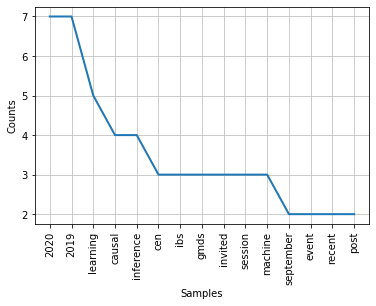

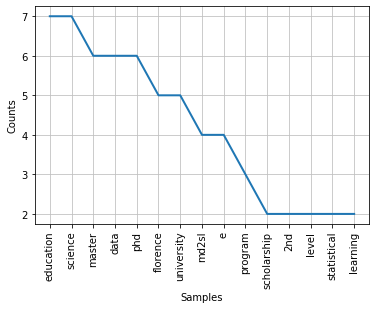

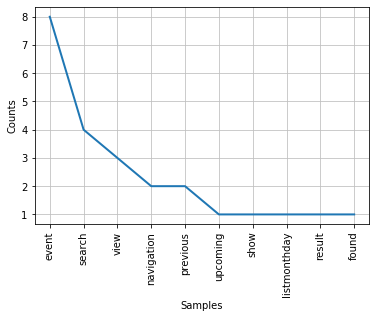

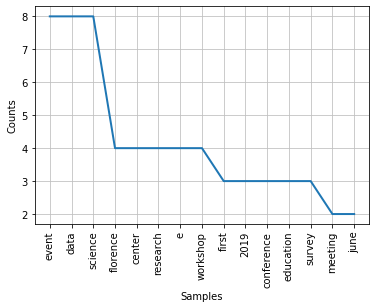

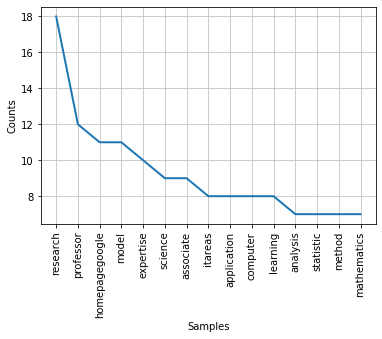

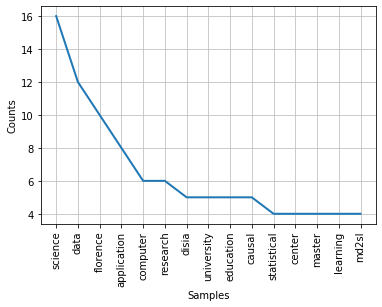

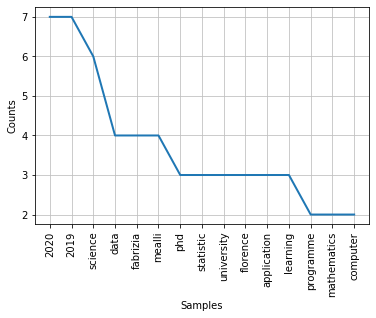

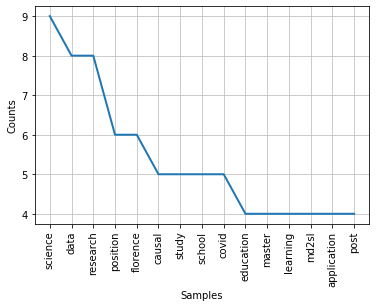

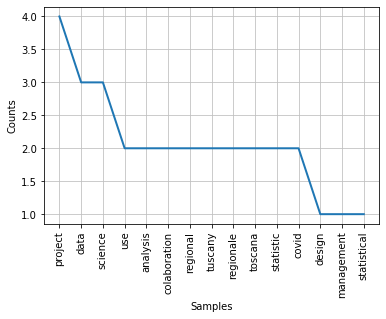

In [17]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

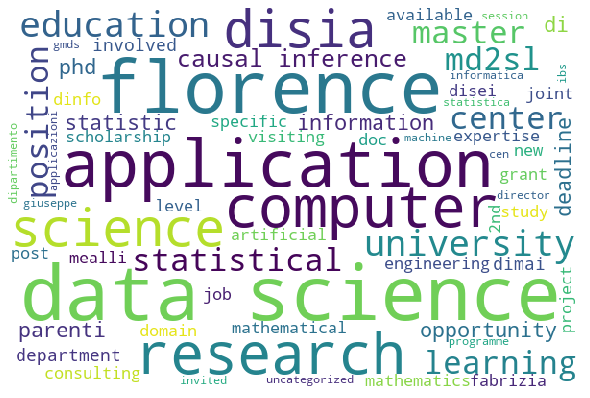

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [18]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [19]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

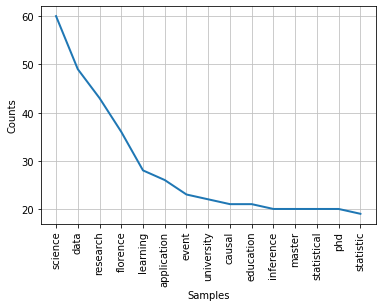

In [20]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [21]:
textfile = open('UniFi.txt', 'w')
textfile.write(tot_text)
textfile.close()

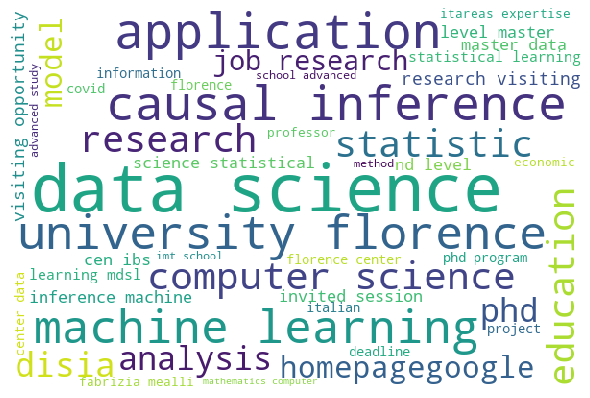

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()